# Correlation matrix for cryptocurrencies

### Importing libraries

In [1]:
import ccxt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%matplotlib inline

### API

In [2]:
exchange = ccxt.binance()

### Loading data

In [3]:
exchange.load_markets()

### Initialization ###
### Type symbols for correlation matrix ###
symbols = ["BTC", "ETH", "XRP", "LINK", "BCH", "LTC", "BSV", "ADA", "EOS", "BNB"]
### Type timeframe ###
tf = '1d'
ohlcv_dict = dict()
min_length = 10000

if exchange.has['fetchOHLCV']:
    for sym in symbols:
        time.sleep(exchange.rateLimit / 1000) # time.sleep wants seconds
        ohlcv_dict[sym] = exchange.fetch_ohlcv(sym + "/USDT", tf)
        if len(ohlcv_dict[sym]) < min_length:
            min_length = len(ohlcv_dict[sym])
print("Length of ohlcv_dict is", len(ohlcv_dict))

Length of ohlcv_dict is 10


### Correlation matrix

In [4]:
if len(ohlcv_dict) > 0:
    data = list()
    for i in range(1, min_length):
        d = list()
        for key in ohlcv_dict:
            d += ohlcv_dict[key][i][1:]
        data.append(d)

    header = list()
    for sym in symbols:
        header.append(sym + "Open")
        header.append(sym + "High")
        header.append(sym + "Low")
        header.append(sym + "Close")
        header.append(sym + "Volume")

    df = pd.DataFrame(data, columns=header)

    close = list()
    for sym in symbols:
        close.append(sym + "Close")

    dfClose = df[close]
    print("The shape is ", dfClose.shape)
    corr = dfClose.corr()

    ### Uncomment this for putting data to .csv
    # df.to_csv("OHLCV.csv")
else:
    print("Fill ohlcv_dict")

The shape is  (157, 10)


### Heatmap

<AxesSubplot:>

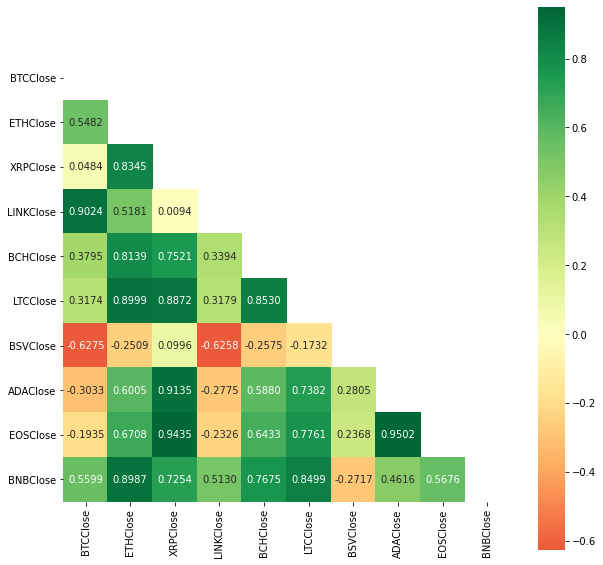

In [5]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt='.4f', mask=mask, center = 0, 
            square=True, cmap="RdYlGn")